---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [45]:
import numpy as np
import pandas as pd

In [44]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [51]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

#df = pd.read_csv('fraud_data.csv')
df = pd.read_csv('data/creditcard.csv')
df_1 = df[df.Class == 1].sample(n=356)
df_0 = df[df.Class == 0].sample(n=21337)
df = pd.concat([df_1, df_0], ignore_index=True)

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [52]:
X_train.shape, X_test.shape

((16269, 30), (5424, 30))

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [47]:
def answer_one():
    
    # Your code here
    ans = np.sum(df.Class == 1)/len(df)
    return ans

answer_one()

0.016410823768035772

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [48]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    
    clf = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    accuracy = clf.score(X_train, y_train)
    recall = recall_score(y_test, y_predict)
    
    return accuracy, recall

answer_two()

(0.98395721925133695, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [49]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    clf = SVC().fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    accuracy = clf.score(X_train, y_train)
    precision = precision_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    
    return accuracy, recall, precision
answer_three()

(0.99987706681418653, 0.021052631578947368, 1.0)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [50]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
    
    params = {'C': 1e9, 'gamma': 1e-07}
    clf = SVC(**params).fit(X_train, y_train)
    y_scores = clf.decision_function(X_test)
    y_predict = y_scores > -220
    
    cm = confusion_matrix(y_test, y_predict)
    
    return cm

answer_four()

array([[   4, 5325],
       [   0,   95]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [53]:
def answer_five():
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve, roc_curve
    # Your code here
    lr = LogisticRegression().fit(X_train, y_train)
    y_scores = lr.decision_function(X_test)

    precision, recall, threshold = precision_recall_curve(y_test, y_scores)
    pr_index = np.abs(precision - 0.75).argmin()    
    ans1 = recall[pr_index]
    
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    ft_index = np.abs(fpr - .16).argmin()
    ans2 = tpr[ft_index]
    
    return ans1, ans2

answer_five()

(0.82105263157894737, 0.87368421052631584)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array.*

In [55]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    
    
    # Your code here
    grid_values = {'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10, 100]}
    clf = LogisticRegression()
    grid_clf = GridSearchCV(clf, param_grid=grid_values, scoring='recall')
    grid_clf.fit(X_train, y_train)
    cvr = grid_clf.cv_results_
    
    dict_list = []
    for p, mts in zip(cvr['params'], cvr['mean_test_score']):
        d = dict(score=mts, **p)
        dict_list.append(d)    
    scores_df = pd.DataFrame(dict_list)    
    ans = scores_df.pivot_table(values='score', index='C', columns='penalty').values
    return ans

answer_six()   

array([[ 0.68965517,  0.72413793],
       [ 0.77394636,  0.75095785],
       [ 0.79310345,  0.77011494],
       [ 0.79693487,  0.75862069],
       [ 0.79693487,  0.77011494]])

<IPython.core.display.Javascript object>


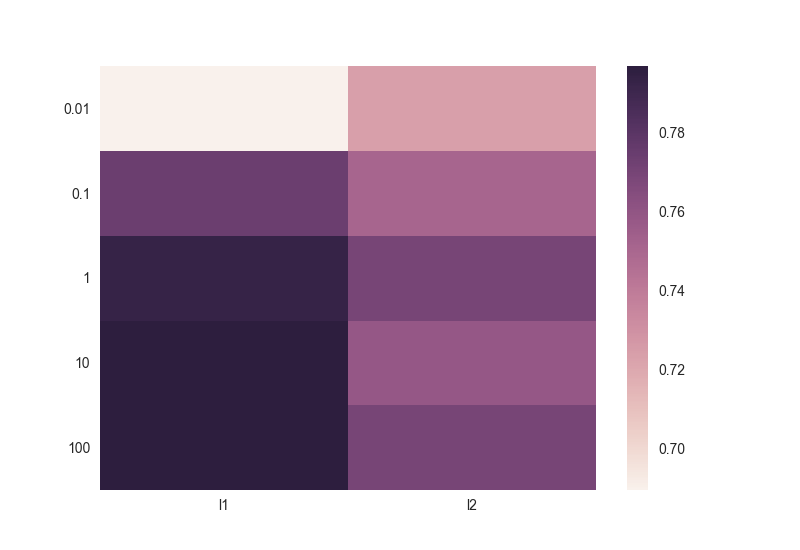

In [57]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);
    plt.show()

GridSearch_Heatmap(answer_six())